# **Memahami Data**

**Memahami Data** atau yang biasa disebut dengan **Data Understanding** adalah salah satu tahap penting dalam proses *Knowledge Discovery in Databases* (KDD) atau Data Mining. Ini merupakan langkah awal yang bertujuan untuk memahami data secara mendalam sebelum melakukan analisis lebih lanjut. Pemahaman data yang baik sangat krusial karena akan memengaruhi keberhasilan seluruh proses data mining.

Beberapa kegiatan dalam memahami data diantaranya adalah:


*   Pengumpulan Data

    Fungsi dari pengumpulan data adalah mengumpulkan data dari berbagai sumber, seperti database, file CSV, API, atau sensor. Serta memastikan bahwa semua data yang relevan telah dikumpulkan sesuai tujuan analisis.

*   Profiling Data

    Untuk fungsi profiling data yaitu membuat ringkasan tentang setiap variabel dalam dataset, termasuk tipe data (numerik, kategorikal, ordinal), rentang nilai, dan frekuensi kemunculan. Serta memahami hubungan antarvariabel menggunakan korelasi atau analisis asosiasi.

*   Korelasi dan Asosiasi

    Fungsi dari kegiatan tersebut adalah menghitung koefisien korelasi (misalnya Pearson, Spearman) untuk melihat hubungan linier antar variabel. Selain itu, juga untuk menggunakan teknik asosiasi untuk menemukan pola hubungan antara variabel kategorikal.
*   Eksplorasi Data

    Eksplorasi Data berfungsi sebagai deskripsi statistik untuk memahami distribusi data, seperti mean, median, modus, standar deviasi, minimum, dan maksimum menggunakan visualisasi data.
*   Identifikasi Masalah Data

    Ada beberapa masalah ketika identifikasi data, seperti;
    1. Missing Values: Menemukan data yang hilang atau tidak lengkap.
    2. Outliers: Mendeteksi nilai-nilai ekstrem yang mungkin merupakan kesalahan atau anomali.
    3. Duplikasi Data: Mengidentifikasi baris atau entri yang duplikat.
    4. Inkonsistensi: Memeriksa apakah ada ketidaksesuaian dalam format atau nilai data.









## **Proses dalam Memahami Data**


### **1. Pengumpulan Data**

Dataset **IRIS** adalah dataset yang berisi informasi tentang tiga spesies bunga iris (*Setosa, Versicolor, Virginica*) dengan fitur utama yaitu; panjang dan lebar dari sepal serta petal.


#### **Lokasi Data**
Teruntuk lokasi dari data **IRIS** berada dalam **aiven.io** (platform cloud dan AI berbasis open source):


*   Data IRIS *petal* berada di database **MySQL**
*   Data IRIS *sepal* berada di database **PostgreSQL**

#### **Metode Pengumpulan**
Langkah untuk mengumpulkan data dilakukan menggunakan **Python** sebagai berikut:
*   **`pymysql`** : Digunakan untuk menghubungkan dan mengambil data dari MySQL.
*   **`psycopg2`** : Digunakan untuk menghubungkan dan mengambil data dari PostgreSQL.
*   **`pandas`** : Digunakan untuk membaca dan mengolah data setelah diambil dari database.

#### **Proses Mengumpulkan Data**
##### **a. Menghubungkan Data dari MySQL dan PostgreSQL**
*   Install library yang diperlukan





In [1]:
!pip install pymysql
!pip install pandas
!pip install psycopg2-binary
!pip install sqlalchemy
!pip install python-dotenv

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.0/45.0 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 35.0 MB/s eta 0:00:00


*   Buat file dengan format (.env) untuk koneksi database dari **aiven**. Untuk isi dari file tersebut sebagai berikut:

```python
# Database MySQL
MYSQL_HOST=<HOSTNAME>
MYSQL_USER=<USERNAME>
MYSQL_PASSWORD=<PASSWORD>
MYSQL_PORT=<PORT>
MYSQL_DATABASE=<DATABASE_NAME>

# Database PostgreSQL
PG_HOST=<HOSTNAME>
PG_USER=<USERNAME>
PG_PASSWORD=<PASSWORD>
PG_PORT=<PORT>
PG_DATABASE=<DATABASE_NAME>
```
*   Lalu upload filenya ke colab.

In [2]:
from google.colab import files
uploaded = files.upload()

Saving .env to .env


*   Koneksikan database dari aiven

In [3]:
import pandas as pd
from sqlalchemy import create_engine
import os
from dotenv import load_dotenv

load_dotenv()

# Ambil variabel koneksi dari lingkungan
MYSQL_HOST = os.getenv("MYSQL_HOST")
MYSQL_PORT = os.getenv("MYSQL_PORT")
MYSQL_USER = os.getenv("MYSQL_USER")
MYSQL_PASSWORD = os.getenv("MYSQL_PASSWORD")
MYSQL_DATABASE = os.getenv("MYSQL_DATABASE")

PG_HOST = os.getenv("PG_HOST")
PG_PORT = os.getenv("PG_PORT")
PG_USER = os.getenv("PG_USER")
PG_PASSWORD = os.getenv("PG_PASSWORD")
PG_DATABASE = os.getenv("PG_DATABASE")

# Gunakan SQLAlchemy untuk koneksi ke MySQL
mysql_engine = create_engine(f"mysql+pymysql://{MYSQL_USER}:{MYSQL_PASSWORD}@{MYSQL_HOST}:{MYSQL_PORT}/{MYSQL_DATABASE}")

# Gunakan SQLAlchemy untuk koneksi ke PostgreSQL
pg_engine = create_engine(f"postgresql+psycopg2://{PG_USER}:{PG_PASSWORD}@{PG_HOST}:{PG_PORT}/{PG_DATABASE}")

# Jalankan query
mysql_query = "SELECT * FROM iris_data;"
df_mysql = pd.read_sql(mysql_query, mysql_engine)

pg_query = "SELECT * FROM iris_data;"
df_postgres = pd.read_sql(pg_query, pg_engine)

# Print hasil
print("Data dari MySQL:")
print(df_mysql.head())

print("\nData dari PostgreSQL:")
print(df_postgres.head())

Data dari MySQL:
   id        class  petal_length  petal_width
0   1  Iris-setosa           1.4          0.2
1   2  Iris-setosa           1.4          0.2
2   3  Iris-setosa           1.3          0.2
3   4  Iris-setosa           1.5          0.2
4   5  Iris-setosa           1.4          0.2

Data dari PostgreSQL:
   id        class  sepal_length  sepal_width
0   1  Iris-setosa           5.1          3.5
1   2  Iris-setosa           4.9          3.0
2   3  Iris-setosa           4.7          3.2
3   4  Iris-setosa           4.6          3.1
4   5  Iris-setosa           5.0          3.6


##### **b. Mengambil dan menampilkan data serta menghapus file yang di upload sebelumnya**

In [8]:
mysql_query = "SELECT * FROM iris_data;"
df_mysql = pd.read_sql(mysql_query, mysql_engine)

pg_query = "SELECT * FROM iris_data;"
df_postgres = pd.read_sql(pg_query, pg_engine)

# Print hasil query
print("Data dari MySQL:")
print(df_mysql.head())

print("\n Data dari PostgreSQL:")
print(df_postgres.head())

#Menghapus file yang di upload sebelumnya
if os.path.exists(".env"):
    os.remove(".env")

Data dari MySQL:
   id        class  petal_length  petal_width
0   1  Iris-setosa           1.4          0.2
1   2  Iris-setosa           1.4          0.2
2   3  Iris-setosa           1.3          0.2
3   4  Iris-setosa           1.5          0.2
4   5  Iris-setosa           1.4          0.2

 Data dari PostgreSQL:
   id        class  sepal_length  sepal_width
0   1  Iris-setosa           5.1          3.5
1   2  Iris-setosa           4.9          3.0
2   3  Iris-setosa           4.7          3.2
3   4  Iris-setosa           4.6          3.1
4   5  Iris-setosa           5.0          3.6


##### **c. Menggabungkan Data dari Kedua Database**

In [26]:
df_combined = pd.merge(df_postgres, df_mysql.drop(columns=['class']), on="id", how="inner")

print("\nData gabungan:")
print(df_combined)


Data gabungan:
      id           class  sepal_length  sepal_width  petal_length  petal_width
0      1     Iris-setosa           5.1          3.5           1.4          0.2
1      2     Iris-setosa           4.9          3.0           1.4          0.2
2      3     Iris-setosa           4.7          3.2           1.3          0.2
3      4     Iris-setosa           4.6          3.1           1.5          0.2
4      5     Iris-setosa           5.0          3.6           1.4          0.2
..   ...             ...           ...          ...           ...          ...
145  146  Iris-virginica           6.7          3.0           5.2          2.3
146  147  Iris-virginica           6.3          2.5           5.0          1.9
147  148  Iris-virginica           6.5          3.0           5.2          2.0
148  149  Iris-virginica           6.2          3.4           5.4          2.3
149  150  Iris-virginica           5.9          3.0           5.1          1.8

[150 rows x 6 columns]


### **2. Profiling Data**
Profiling data termasuk langkah penting dalam memahami karakteristik dataset sebelum melakukan analisis lebih lanjut.

#### **Informasi tentang Dataset**
*   Menampilkan Informasi Dataset



In [27]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            150 non-null    int64  
 1   class         150 non-null    object 
 2   sepal_length  150 non-null    float64
 3   sepal_width   150 non-null    float64
 4   petal_length  150 non-null    float64
 5   petal_width   150 non-null    float64
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


*   Menampilkan Statistik Variabel Numerik



In [29]:
df_combined.drop(columns=['id']).describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


*   Menampilkan Statistik Variabel Kategorikal

In [35]:
print(df_combined['class'].value_counts())

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64


### **3. Korelasi dan Asosiasi**
#### **Memahami Hubungan antar Variabel**
*   Menghitung Korelasi antar Variabel Numerik

In [44]:
df_corr = df_combined.drop(columns=['id', 'class']).corr()
print(df_corr)

              sepal_length  sepal_width  petal_length  petal_width
sepal_length      1.000000    -0.109369      0.871754     0.817954
sepal_width      -0.109369     1.000000     -0.420516    -0.356544
petal_length      0.871754    -0.420516      1.000000     0.962757
petal_width       0.817954    -0.356544      0.962757     1.000000


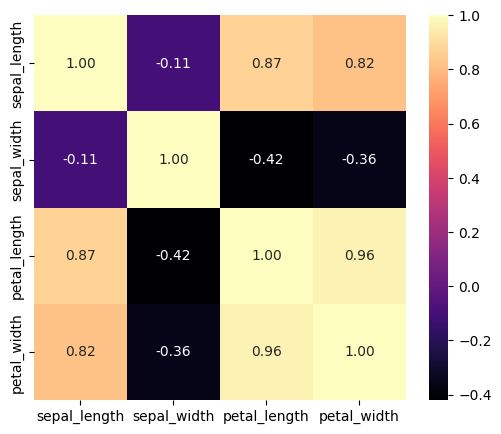

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,5))
sns.heatmap(df_corr, annot=True, cmap='magma', fmt=".2f")

plt.show()


*   Statistik Deskriptif Per Class

In [58]:
df_mean = df_combined.drop(columns=['id']).groupby('class').mean()
print(df_mean)

                 sepal_length  sepal_width  petal_length  petal_width
class                                                                
Iris-setosa             5.006        3.418         1.464        0.244
Iris-versicolor         5.936        2.770         4.260        1.326
Iris-virginica          6.588        2.974         5.552        2.026


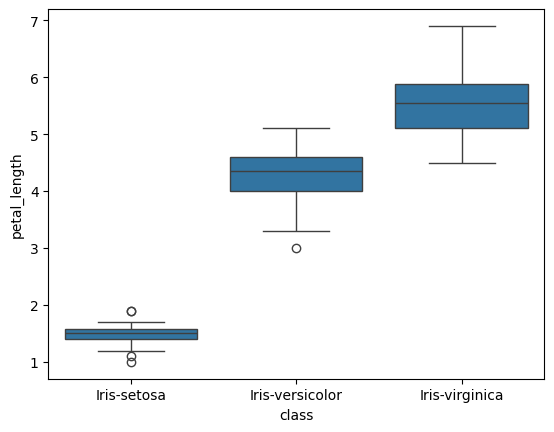

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x="class", y="petal_length", data=df_combined)
plt.show()

### **4. Eksplorasi Data**
Eksplorasi data bertujuan untuk mendeskripsikan statistik untuk memahami distribusi data


In [63]:
df_combined.drop(columns=['id']).describe().loc[['mean', 'std', 'min', '50%', 'max']]

,sepal_length,sepal_width,petal_length,petal_width
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
50%,5.800000,3.000000,4.350000,1.300000
max,7.900000,4.400000,6.900000,2.500000


**a. Distribusi Data Numerik**

menggunakan histogram untuk melihat sebaran nilai dari setiap fitur

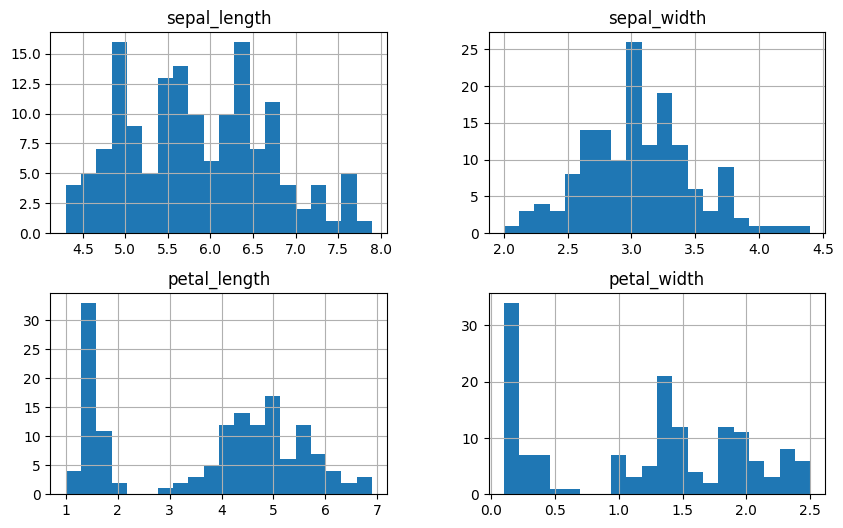

In [64]:
import matplotlib.pyplot as plt

df_combined.loc[:, df_combined.columns != 'id'].hist(figsize=(10, 6), bins=20)
plt.show()

**b. Hubungan antar Variabel**

Scatter plot membantu melihat hubungan antara dua variabel numerik.

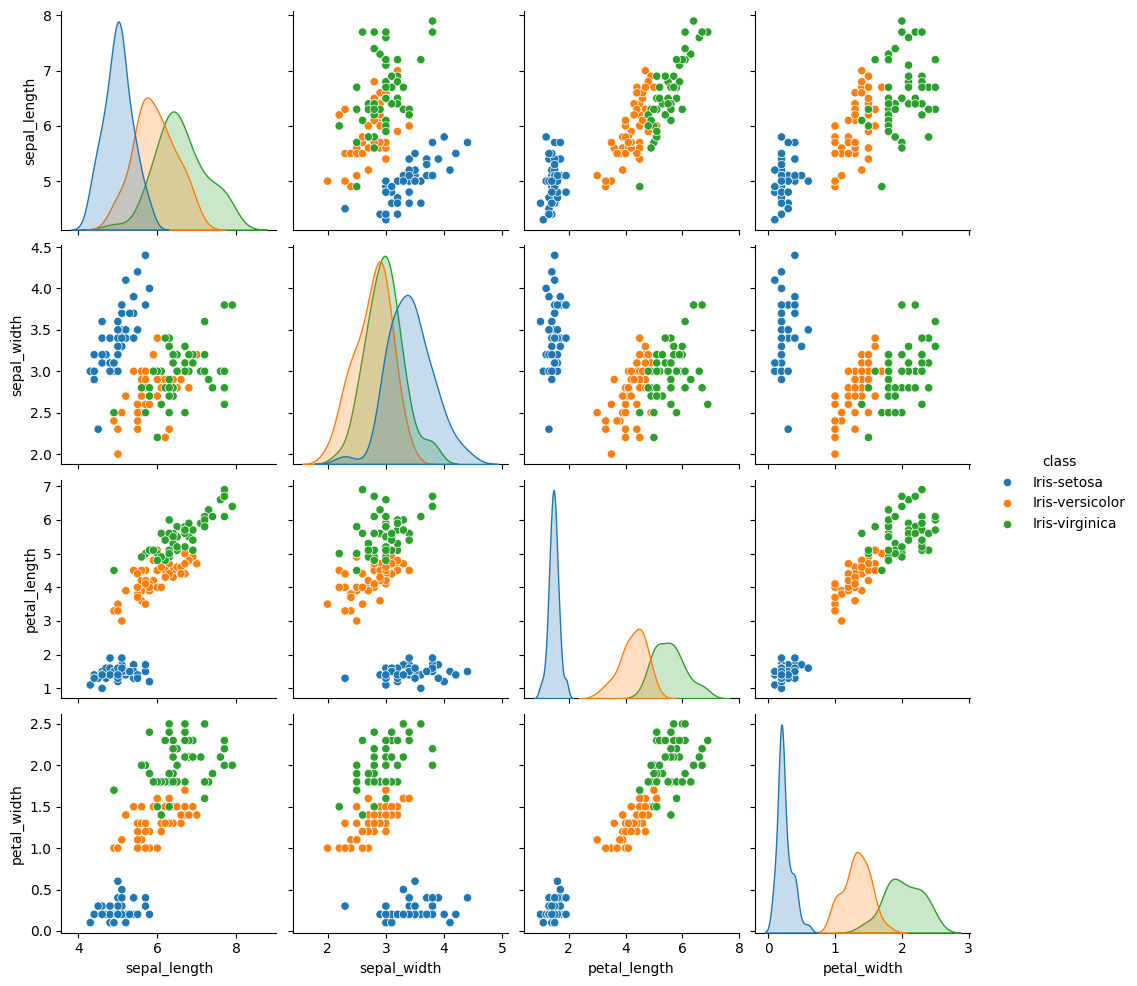

In [65]:
sns.pairplot(df_combined.drop(columns=["id"]), hue="class")
plt.show()

**c. Ditribusi Data tiap Kategori**

Menggunakan box plot untuk melihat tiap kategori.

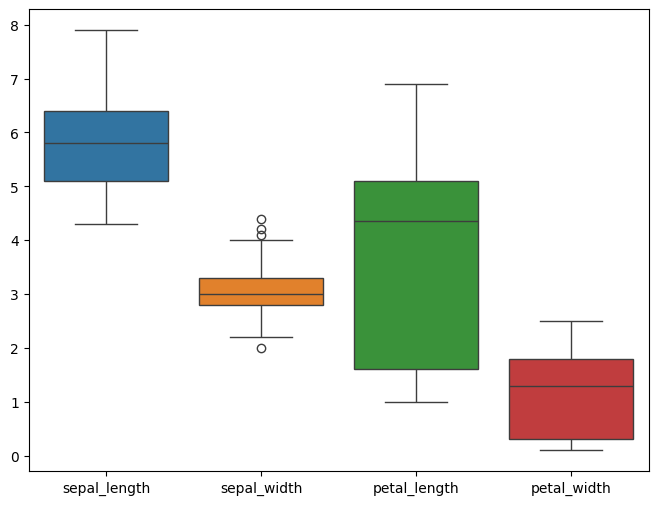

In [66]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df_combined.loc[:, df_combined.columns != 'id'])
plt.show()

**d. Proporsi tiap Spesies Bunga**

Menggunakan pie chart untuk melihat tiap spesies bunga.

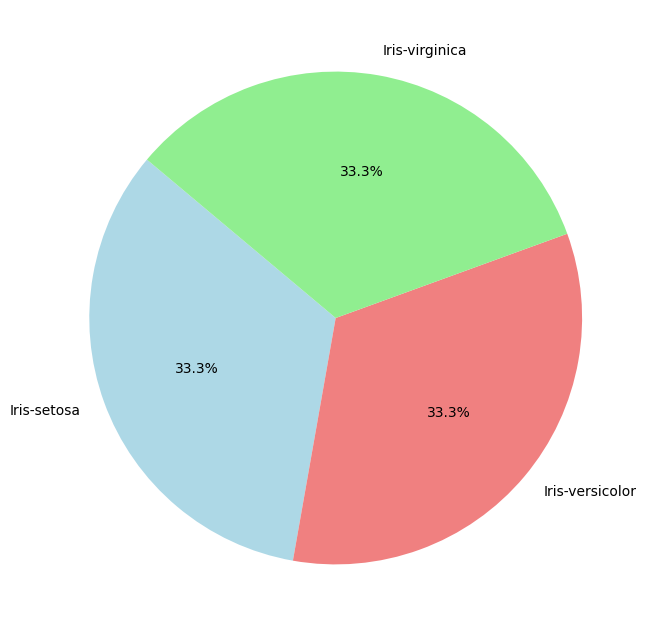

In [67]:
import matplotlib.pyplot as plt

category_counts = df_combined['class'].value_counts()

# Membuat pie chart
plt.figure(figsize=(8, 8))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140, colors=['lightblue', 'lightcoral', 'lightgreen'])
plt.show()


### **5. Indentifikasi Masalah**

Mengidentifikasi Masalah jika menemukan potensi kendala dalam dataset yang bisa mempengaruhi analisis dan modeling.

#### **Mengecek Data Hilang (Missing Value)**

In [68]:
print(df_combined.isnull().sum())

id              0
class           0
sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
dtype: int64


#### **Mendeteksi Outliers**

In [69]:
# Memilih hanya kolom numerik
df_numeric = df_combined.select_dtypes(include=['number'])

# Menghitung IQR
Q1 = df_numeric.quantile(0.25)
Q3 = df_numeric.quantile(0.75)
IQR = Q3 - Q1

# Menentukan outliers
outliers = (df_numeric < (Q1 - 1.5 * IQR)) | (df_numeric > (Q3 + 1.5 * IQR))
print(outliers.sum())


id              0
sepal_length    0
sepal_width     4
petal_length    0
petal_width     0
dtype: int64


#### **Mengecek Duplikasi Data**


In [70]:
print(df_combined.duplicated().sum())

0


#### **Mengecek Inkonsistensi**

In [72]:
# Cek kategori unik dalam Class
print(df_combined['class'].unique())

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


In [73]:
# Cek tipe data setiap kolom
print(df_combined.dtypes)

id                int64
class            object
sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
dtype: object


In [75]:
# cek tipe data setiap nilai
for col in ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']:
    print(f"{col}: {df_combined[col].apply(type).unique()}")

sepal_length: [<class 'float'>]
sepal_width: [<class 'float'>]
petal_length: [<class 'float'>]
petal_width: [<class 'float'>]
